## Problem Statement

Within the dynamic landscape of the telecommunications industry, customers enjoy the privilage of selecting the numerous service
providers and retaining the flexibility to switch between operators as they see fit. This environment of robust competition has
resulted in the telecommunications sector witnessing an annual churn rate ranging from 15% to 20%. In this case study, we will
predict the churn for pre-paid customers who are predominent in the Indian and South Asian market.

## Business Objective 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) 
from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings ('ignore')
#import datatest as dt
from collections import Counter

## Data import

In [2]:
data = pd.read_csv('telecom_churn_data.csv')

In [3]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
data.shape

(99999, 226)

In [6]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [7]:
datacol = data.columns.values
datacol.shape

(226,)

In [8]:
datacol

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

## Data Preparation

In [9]:
#As per the case study, we need to find out average amount of first two months recharge (6th and 7th mnth)

In [10]:
data['Total_Rechg_Months_6_7'] = data['total_rech_amt_6'] + data['total_rech_amt_7']

In [11]:
data['Total_Rechg_Months_6_7'].describe()

count    99999.000000
mean       650.477585
std        741.666932
min          0.000000
25%        230.000000
50%        458.000000
75%        838.000000
max      75525.000000
Name: Total_Rechg_Months_6_7, dtype: float64

In [12]:
# predicting customers with 70 percentile of the average amount 

In [13]:
data['Total_Rechg_Months_6_7'].describe(percentiles=[0.7])

count    99999.000000
mean       650.477585
std        741.666932
min          0.000000
50%        458.000000
70%        737.000000
max      75525.000000
Name: Total_Rechg_Months_6_7, dtype: float64

In [14]:
data_high_val_cust = data[data['Total_Rechg_Months_6_7']>737]

In [15]:
data_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 227 entries, mobile_number to Total_Rechg_Months_6_7
dtypes: float64(179), int64(36), object(12)
memory usage: 52.1+ MB


As we see, there are approximately 30000 high value customer. 

In [16]:
data_high_val_cust.drop(columns=['Total_Rechg_Months_6_7'], inplace=True)

## Handling Columns with Null values

In [17]:
data_null_calc = pd.DataFrame(data_high_val_cust.isnull().sum()/len(data_high_val_cust.index))

In [18]:
data_null_calc

,0
mobile_number,0.000000
circle_id,0.000000
loc_og_t2o_mou,0.003803
std_og_t2o_mou,0.003803
loc_ic_t2o_mou,0.003803
...,...
aon,0.000000
aug_vbc_3g,0.000000
jul_vbc_3g,0.000000
jun_vbc_3g,0.000000


In [19]:
data_null_calc.columns = ['nullvalperc']

In [20]:
data_null_calc.sort_values(by='nullvalperc', ascending=False)

,nullvalperc
arpu_3g_6,0.620167
total_rech_data_6,0.620167
night_pck_user_6,0.620167
count_rech_3g_6,0.620167
max_rech_data_6,0.620167
...,...
max_rech_amt_7,0.000000
max_rech_amt_6,0.000000
total_rech_amt_9,0.000000
total_rech_amt_8,0.000000


In [21]:
data_null_calc = data_null_calc[data_null_calc.nullvalperc >= 0.50]

In [22]:
columnsToDrop = data_null_calc.index

In [23]:
columnsToDrop

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [24]:
data_high_val_cust = data_high_val_cust.loc[:,~data_high_val_cust.columns.isin(columnsToDrop)]

In [25]:
data_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: float64(143), int64(35), object(8)
memory usage: 42.8+ MB


In [26]:
data_high_val_cust

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,0,0,0,0,802,57.74,19.38,18.74,0.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,0,0,0,0,315,21.03,910.65,122.16,0.0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,0,0,0,0,0,2607,0.00,0.00,0.00,0.0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,0,0,0,0,0,511,0.00,2.45,21.89,0.0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,0,0,0,0,0,667,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,7001386760,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.269,...,0,0,0,0,0,1022,0.00,0.00,0.00,0.0
99974,7001453306,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,414.303,...,0,0,0,0,0,3054,0.00,0.00,0.00,0.0
99986,7001729035,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,644.973,...,0,0,0,0,0,2696,497.45,598.67,604.08,0.0
99988,7002111859,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,312.558,...,0,0,0,0,0,328,104.73,0.00,0.00,0.0


## Identify Numerical and Categorical Features

In [27]:
numcol = data_high_val_cust.select_dtypes('number').columns
catcol = data_high_val_cust.select_dtypes('object').columns
numcol = list(set(numcol))
catcol = list(set(catcol))

In [28]:
len(numcol)

178

In [29]:
len(catcol)

8

In [30]:
numcol

['loc_og_t2f_mou_8',
 'arpu_7',
 'og_others_9',
 'loc_og_t2f_mou_9',
 'vol_3g_mb_6',
 'ic_others_9',
 'jun_vbc_3g',
 'sachet_2g_8',
 'loc_og_t2t_mou_6',
 'std_og_t2m_mou_7',
 'roam_og_mou_9',
 'total_ic_mou_8',
 'roam_ic_mou_9',
 'isd_ic_mou_7',
 'loc_ic_t2m_mou_7',
 'offnet_mou_6',
 'offnet_mou_7',
 'std_ic_t2f_mou_7',
 'monthly_2g_7',
 'spl_ic_mou_8',
 'ic_others_8',
 'max_rech_amt_9',
 'mobile_number',
 'loc_og_t2t_mou_7',
 'og_others_8',
 'std_og_t2m_mou_8',
 'std_ic_t2f_mou_9',
 'vol_2g_mb_9',
 'std_ic_mou_7',
 'std_ic_t2m_mou_8',
 'loc_og_t2m_mou_6',
 'sachet_2g_6',
 'monthly_3g_8',
 'std_og_t2t_mou_8',
 'sachet_3g_6',
 'spl_ic_mou_6',
 'ic_others_7',
 'loc_og_t2f_mou_6',
 'std_ic_t2t_mou_9',
 'vol_3g_mb_7',
 'loc_og_t2f_mou_7',
 'monthly_2g_9',
 'onnet_mou_7',
 'loc_og_t2c_mou_8',
 'std_og_t2t_mou_9',
 'roam_ic_mou_8',
 'total_rech_num_6',
 'spl_ic_mou_7',
 'std_og_t2f_mou_7',
 'aon',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_og_t2c_mou_9',
 'monthly_2

In [31]:
catcol

['date_of_last_rech_8',
 'last_date_of_month_9',
 'last_date_of_month_6',
 'date_of_last_rech_9',
 'date_of_last_rech_7',
 'date_of_last_rech_6',
 'last_date_of_month_7',
 'last_date_of_month_8']

## Feature Identification 

In [32]:
data_high_val_cust_numcol_uniqueval = pd.DataFrame(data_high_val_cust.loc[:,numcol].nunique())

In [33]:
data_high_val_cust_numcol_uniqueval.columns= ['uniqueval']

In [34]:
featureNoSignificance= data_high_val_cust_numcol_uniqueval[data_high_val_cust_numcol_uniqueval.uniqueval==1].index

In [35]:
featureNoSignificance

Index(['std_ic_t2o_mou_6', 'std_og_t2c_mou_9', 'loc_og_t2o_mou',
       'std_og_t2c_mou_7', 'loc_ic_t2o_mou', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_9', 'circle_id', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_8',
       'std_og_t2o_mou', 'std_og_t2c_mou_6'],
      dtype='object')

In [36]:
data_high_val_cust = data_high_val_cust.loc[:,~data_high_val_cust.columns.isin(featureNoSignificance)]

In [37]:
data_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 174 entries, mobile_number to sep_vbc_3g
dtypes: float64(132), int64(34), object(8)
memory usage: 40.0+ MB


In [38]:
data_high_val_cust.loc[:,catcol].nunique()

date_of_last_rech_8     31
last_date_of_month_9     1
last_date_of_month_6     1
date_of_last_rech_9     30
date_of_last_rech_7     31
date_of_last_rech_6     30
last_date_of_month_7     1
last_date_of_month_8     1
dtype: int64

In [39]:
data_high_val_cust_catcol_uniqueval = pd.DataFrame(data_high_val_cust.loc[:,catcol].nunique())

In [40]:
data_high_val_cust_catcol_uniqueval.columns = ['uniqueval']

In [41]:
data_high_val_cust_catcol_uniqueval

,uniqueval
date_of_last_rech_8,31
last_date_of_month_9,1
last_date_of_month_6,1
date_of_last_rech_9,30
date_of_last_rech_7,31
date_of_last_rech_6,30
last_date_of_month_7,1
last_date_of_month_8,1


In [42]:
featureNoSignificance = data_high_val_cust_catcol_uniqueval[data_high_val_cust_catcol_uniqueval.uniqueval==1].index

In [43]:
featureNoSignificance

Index(['last_date_of_month_9', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8'],
      dtype='object')

In [44]:
data_high_val_cust = data_high_val_cust.loc[:,~data_high_val_cust.columns.isin(featureNoSignificance)]

## Null Value Treatment 

In [45]:
nullPerCols = pd.DataFrame(round((data_high_val_cust.isnull().sum()/len(data_high_val_cust.index))* 100, 2), columns=['NullPercentage'])
nullPerLess50Percent = np.array(nullPerCols.apply(lambda x: ((x['NullPercentage'] < 50) & (x['NullPercentage'] > 0)) , axis=1))
len(np.array(data_high_val_cust.loc[:, nullPerLess50Percent].columns))

112

In [46]:
df_temp = data_high_val_cust.loc[:,nullPerLess50Percent]
round(df_temp.isnull().sum()/len(df_temp.index)*100,2)

onnet_mou_6            1.05
onnet_mou_7            1.01
onnet_mou_8            3.13
onnet_mou_9            5.68
offnet_mou_6           1.05
                       ... 
ic_others_9            5.68
date_of_last_rech_6    0.21
date_of_last_rech_7    0.38
date_of_last_rech_8    1.98
date_of_last_rech_9    2.89
Length: 112, dtype: float64

In [47]:
data_high_val_cust = data_high_val_cust.fillna(0)

In [48]:
data_high_val_cust

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,...,0,0,0,0,0,802,57.74,19.38,18.74,0.0
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,0,0,0,0,0,315,21.03,910.65,122.16,0.0
13,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,...,0,0,0,0,0,2607,0.00,0.00,0.00,0.0
16,7000875565,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,...,0,0,0,0,0,511,0.00,2.45,21.89,0.0
17,7000187447,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,...,0,0,0,0,0,667,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,7001386760,261.269,410.614,290.851,330.963,5.01,142.59,97.61,206.19,329.58,...,0,0,0,0,0,1022,0.00,0.00,0.00,0.0
99974,7001453306,414.303,321.093,371.016,306.689,17.56,0.00,1.30,2.46,428.41,...,0,0,0,0,0,3054,0.00,0.00,0.00,0.0
99986,7001729035,644.973,455.228,564.334,267.451,806.73,549.36,775.41,692.63,784.76,...,0,0,0,0,0,2696,497.45,598.67,604.08,0.0
99988,7002111859,312.558,512.932,402.080,533.502,199.89,174.46,2.46,7.16,175.88,...,0,0,0,0,0,328,104.73,0.00,0.00,0.0


## Tagging churners and remove attributes of churn phase

In [49]:
condition1 = (data_high_val_cust['total_ic_mou_9'] == 0.0) | (data_high_val_cust['total_og_mou_9'] == 0.0)
condition2 = (data_high_val_cust['vol_2g_mb_9'] == 0.0) & (data_high_val_cust['vol_3g_mb_9'] == 0.0)

data_high_val_cust['churn'] = np.where(np.logical_and(condition1, condition2), 1, 0)

In [50]:
data_high_val_cust = data_high_val_cust.drop(data_high_val_cust.filter(like = '9').columns, axis=1)

In [51]:
data_high_val_cust

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,0,0,0,315,21.03,910.65,122.16,0.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,...,0,0,0,0,511,0.00,2.45,21.89,0.0,0
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,...,0,0,0,0,667,0.00,0.00,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,7001386760,261.269,410.614,290.851,5.01,142.59,97.61,329.58,500.14,355.48,...,0,0,0,0,1022,0.00,0.00,0.00,0.0,0
99974,7001453306,414.303,321.093,371.016,17.56,0.00,1.30,428.41,366.78,360.58,...,0,0,0,0,3054,0.00,0.00,0.00,0.0,0
99986,7001729035,644.973,455.228,564.334,806.73,549.36,775.41,784.76,617.13,595.44,...,0,0,0,0,2696,497.45,598.67,604.08,0.0,0
99988,7002111859,312.558,512.932,402.080,199.89,174.46,2.46,175.88,277.01,248.33,...,0,0,0,0,328,104.73,0.00,0.00,0.0,0


In [52]:
data_high_val_cust.loc[:,~data_high_val_cust.columns.isin(data_high_val_cust.filter(like = '9').columns)]

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,0,0,0,315,21.03,910.65,122.16,0.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,...,0,0,0,0,511,0.00,2.45,21.89,0.0,0
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,...,0,0,0,0,667,0.00,0.00,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,7001386760,261.269,410.614,290.851,5.01,142.59,97.61,329.58,500.14,355.48,...,0,0,0,0,1022,0.00,0.00,0.00,0.0,0
99974,7001453306,414.303,321.093,371.016,17.56,0.00,1.30,428.41,366.78,360.58,...,0,0,0,0,3054,0.00,0.00,0.00,0.0,0
99986,7001729035,644.973,455.228,564.334,806.73,549.36,775.41,784.76,617.13,595.44,...,0,0,0,0,2696,497.45,598.67,604.08,0.0,0
99988,7002111859,312.558,512.932,402.080,199.89,174.46,2.46,175.88,277.01,248.33,...,0,0,0,0,328,104.73,0.00,0.00,0.0,0


# Exploratory Data Analysis

In [53]:
data_high_val_cust.churn.value_counts(normalize=True)

0    0.903599
1    0.096401
Name: churn, dtype: float64

In [54]:
numcol = data_high_val_cust.select_dtypes('number').columns

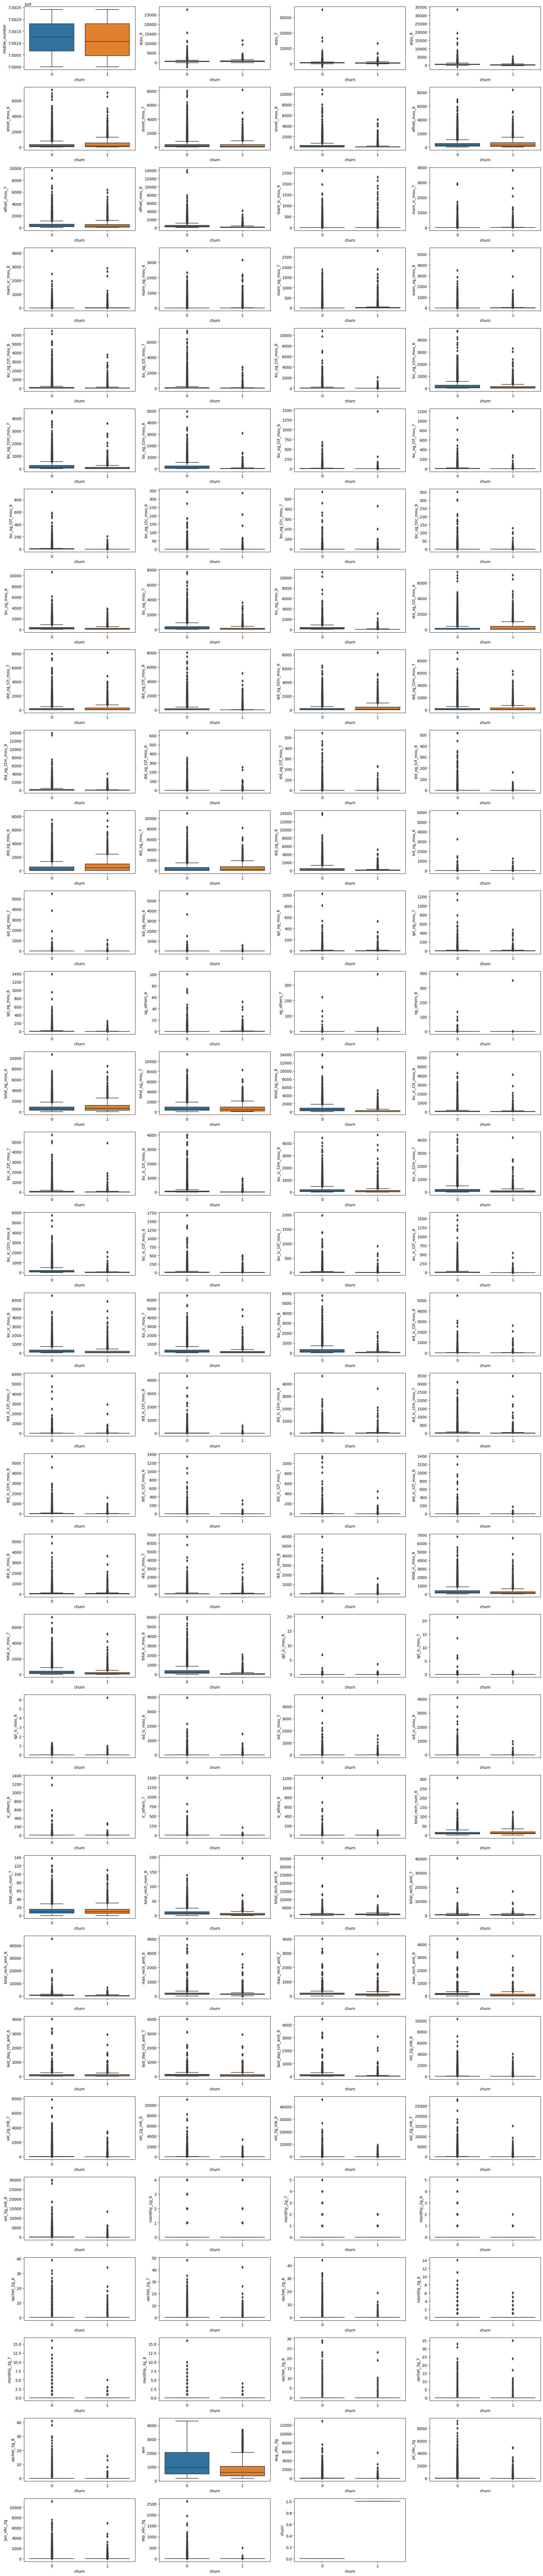

In [55]:
fig = plt.figure(figsize=(20,100))
for i in range (len(numcol)):
    fig.add_subplot(34, 4, i+1)
    sns.boxplot(y=data_high_val_cust.loc[:,numcol].iloc[:,i], x=data_high_val_cust['churn'])
plt.tight_layout()
plt.show()

In [56]:
conditions = (
    (data_high_val_cust['arpu_6'] > 15000) |
    (data_high_val_cust['arpu_7'] > 20000) |
    (data_high_val_cust['arpu_8'] > 20000) |
    (data_high_val_cust['onnet_mou_8'] > 8000) |
    (data_high_val_cust['offnet_mou_7'] > 9000) |
    (data_high_val_cust['offnet_mou_8'] > 10000) |
    (data_high_val_cust['loc_og_t2t_mou_6'] > 6000) |
    (data_high_val_cust['loc_og_t2t_mou_7'] > 5000) |
    (data_high_val_cust['loc_og_t2t_mou_8'] > 6000) |
    (data_high_val_cust['loc_og_t2m_mou_6'] > 4000) |
    (data_high_val_cust['loc_og_t2f_mou_7'] > 600) |
    (data_high_val_cust['loc_og_t2f_mou_8'] > 600) |
    (data_high_val_cust['loc_og_t2c_mou_8'] > 250) |
    (data_high_val_cust['loc_og_mou_6'] > 8000) |
    (data_high_val_cust['loc_og_mou_7'] > 6000) |
    (data_high_val_cust['loc_og_mou_8'] > 6000) |
    (data_high_val_cust['std_og_t2m_mou_8'] > 8000) |
    (data_high_val_cust['std_og_t2f_mou_6'] > 400) |
    (data_high_val_cust['std_og_t2f_mou_7'] > 400) |
    (data_high_val_cust['std_og_t2f_mou_8'] > 400) |
    (data_high_val_cust['std_og_mou_8'] > 10000) |
    (data_high_val_cust['spl_og_mou_7'] > 800) |
    (data_high_val_cust['spl_og_mou_8'] > 600) |
    (data_high_val_cust['total_og_mou_8'] > 8000) |
    (data_high_val_cust['loc_ic_t2m_mou_8'] > 3000) |
    (data_high_val_cust['loc_ic_t2f_mou_6'] > 1000) |
    (data_high_val_cust['loc_ic_t2f_mou_8'] > 1000) |
    (data_high_val_cust['loc_ic_mou_8'] > 4000) |
    (data_high_val_cust['std_ic_t2m_mou_8'] > 3000) |
    (data_high_val_cust['std_ic_t2f_mou_8'] > 800) |
    (data_high_val_cust['std_ic_mou_8'] > 3000) |
    (data_high_val_cust['total_ic_mou_8'] > 4000) |
    (data_high_val_cust['isd_ic_mou_7'] > 3000) |
    (data_high_val_cust['isd_ic_mou_8'] > 2000) |
    (data_high_val_cust['ic_others_8'] > 400) |
    (data_high_val_cust['sachet_2g_8'] > 30) |
    (data_high_val_cust['sachet_3g_8'] > 30)
)

data_high_val_cust = data_high_val_cust[~conditions]


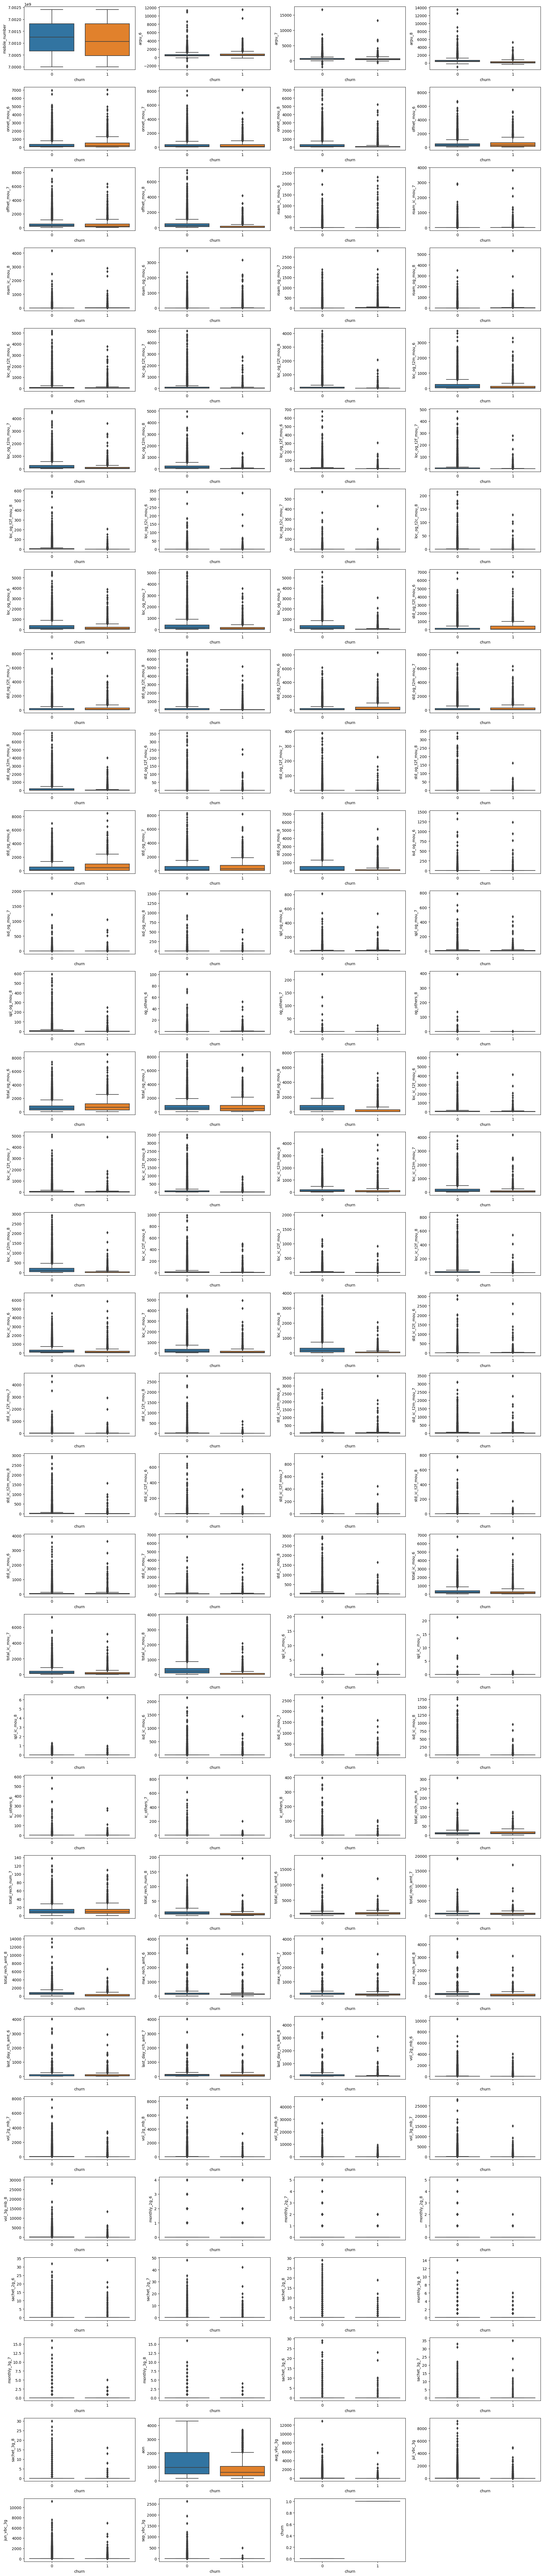

In [59]:
#after outlier treatment 

fig = plt.figure(figsize=(20,100))
for i in range(len(numcol)):
    fig.add_subplot(34, 4, i+1)
    sns.boxplot(y=data_high_val_cust.loc[:, numcol].iloc[:,i],x=data_high_val_cust['churn'])
plt.tight_layout()
plt.show()

### Analysing patterns of Churn vs Non-Churn Customers

In [60]:
#Derive features to see percentage of calls for month 6

data_high_val_cust['loc_og_mou_6_perc'] = round((data_high_val_cust['loc_og_mou_6']/data_high_val_cust['total_og_mou_6']) * 100,2)
data_high_val_cust['std_og_mou_6_perc'] = round((data_high_val_cust['std_og_mou_6']/data_high_val_cust['total_og_mou_6']) * 100,2)
data_high_val_cust['spl_og_mou_6_perc'] = round((data_high_val_cust['spl_og_mou_6']/data_high_val_cust['total_og_mou_6']) * 100,2)
data_high_val_cust['og_others_6_perc'] = round((data_high_val_cust['og_others_6']/data_high_val_cust['total_og_mou_6']) * 100,2)
data_high_val_cust['loc_ic_mou_6_perc'] = round((data_high_val_cust['loc_ic_mou_6']/data_high_val_cust['total_ic_mou_6']) * 100,2)
data_high_val_cust['std_ic_mou_6_perc'] = round((data_high_val_cust['std_ic_mou_6']/data_high_val_cust['total_ic_mou_6']) * 100,2)
data_high_val_cust['spl_ic_mou_6_perc'] = round((data_high_val_cust['spl_ic_mou_6']/data_high_val_cust['total_ic_mou_6']) * 100,2)
data_high_val_cust['ic_others_6_perc'] = round((data_high_val_cust['ic_others_6']/data_high_val_cust['total_ic_mou_6']) * 100,2)

In [61]:
# Derive features to see percentage of calls for mnth 7

data_high_val_cust['loc_og_mou_7_perc'] = round((data_high_val_cust['loc_og_mou_7']/data_high_val_cust['total_og_mou_7']) * 100,2)
data_high_val_cust['std_og_mou_7_perc'] = round((data_high_val_cust['std_og_mou_7']/data_high_val_cust['total_og_mou_7']) * 100,2)
data_high_val_cust['spl_og_mou_7_perc'] = round((data_high_val_cust['spl_og_mou_7']/data_high_val_cust['total_og_mou_7']) * 100,2)
data_high_val_cust['og_others_7_perc'] = round((data_high_val_cust['og_others_7']/data_high_val_cust['total_og_mou_7']) * 100,2)
data_high_val_cust['loc_ic_mou_7_perc'] = round((data_high_val_cust['loc_ic_mou_7']/data_high_val_cust['total_ic_mou_7']) * 100,2)
data_high_val_cust['std_ic_mou_7_perc'] = round((data_high_val_cust['std_ic_mou_7']/data_high_val_cust['total_ic_mou_7']) * 100,2)
data_high_val_cust['spl_ic_mou_7_perc'] = round((data_high_val_cust['spl_ic_mou_7']/data_high_val_cust['total_ic_mou_7']) * 100,2)
data_high_val_cust['ic_others_7_perc'] = round((data_high_val_cust['ic_others_7']/data_high_val_cust['total_ic_mou_7']) * 100,2)

In [62]:
# Derive features to see perncetage of calls for mnth 8

data_high_val_cust['loc_og_mou_8_perc'] = round((data_high_val_cust['loc_og_mou_8']/data_high_val_cust['total_og_mou_8']) * 100,2)
data_high_val_cust['std_og_mou_8_perc'] = round((data_high_val_cust['std_og_mou_8']/data_high_val_cust['total_og_mou_8']) * 100,2)
data_high_val_cust['spl_og_mou_8_perc'] = round((data_high_val_cust['spl_og_mou_8']/data_high_val_cust['total_og_mou_8']) * 100,2)
data_high_val_cust['og_others_8_perc'] = round((data_high_val_cust['og_others_8']/data_high_val_cust['total_og_mou_8']) * 100,2)
data_high_val_cust['loc_ic_mou_8_perc'] = round((data_high_val_cust['loc_ic_mou_8']/data_high_val_cust['total_ic_mou_8']) * 100,2)
data_high_val_cust['std_ic_mou_8_perc'] = round((data_high_val_cust['std_ic_mou_8']/data_high_val_cust['total_ic_mou_8']) * 100,2)
data_high_val_cust['spl_ic_mou_8_perc'] = round((data_high_val_cust['spl_ic_mou_8']/data_high_val_cust['total_ic_mou_8']) * 100,2)
data_high_val_cust['ic_others_8_perc'] = round((data_high_val_cust['ic_others_8']/data_high_val_cust['total_ic_mou_8']) * 100,2)

In [63]:
data_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29888 entries, 7 to 99997
Columns: 154 entries, mobile_number to ic_others_8_perc
dtypes: float64(124), int32(1), int64(26), object(3)
memory usage: 35.2+ MB


In [64]:
#fill nan values

data_high_val_cust = data_high_val_cust.fillna(0).reset_index()

In [65]:
catcol = data_high_val_cust.select_dtypes('object').columns

In [67]:
data_high_val_cust = data_high_val_cust.loc[:,~data_high_val_cust.columns.isin(catcol)]

In [68]:
data_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29888 entries, 0 to 29887
Columns: 152 entries, index to ic_others_8_perc
dtypes: float64(124), int32(1), int64(27)
memory usage: 34.5 MB


In [75]:
# lets write a function to plot historgram for some sample columns

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if 1 < nunique[col] < 50]]  # Select columns with 1-49 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow  # Use integer division
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('Counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


In [79]:
# function to plot correlation matrix
import matplotlib.pyplot as plt

def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    
    df = df.dropna(axis='columns')
    
    df = df[[col for col in df if df[col].nunique() > 1]]
    
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return

    corr = df.corr()

    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    
    # Customize the x and y axis labels
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    
    plt.colorbar(corrMat)
    
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [80]:
# function to plot scatter plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])
    
    df = df.dropna(axis='columns').dropna()
    
    columnNames = list(df.columns)
    
    if len(columnNames) > 10:
        
        columnNames = columnNames[:10]
        df = df[columnNames]
    
    # Create the scatter matrix with diagonal KDE plots
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=(plotSize, plotSize), diagonal='kde')
    
    corrs = df.corr().values
    for i, j in zip(*np.triu_indices_from(ax, k=1)):
      
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    

    plt.suptitle('Scatter and Density Plot', size=textSize * 2)
    plt.show()


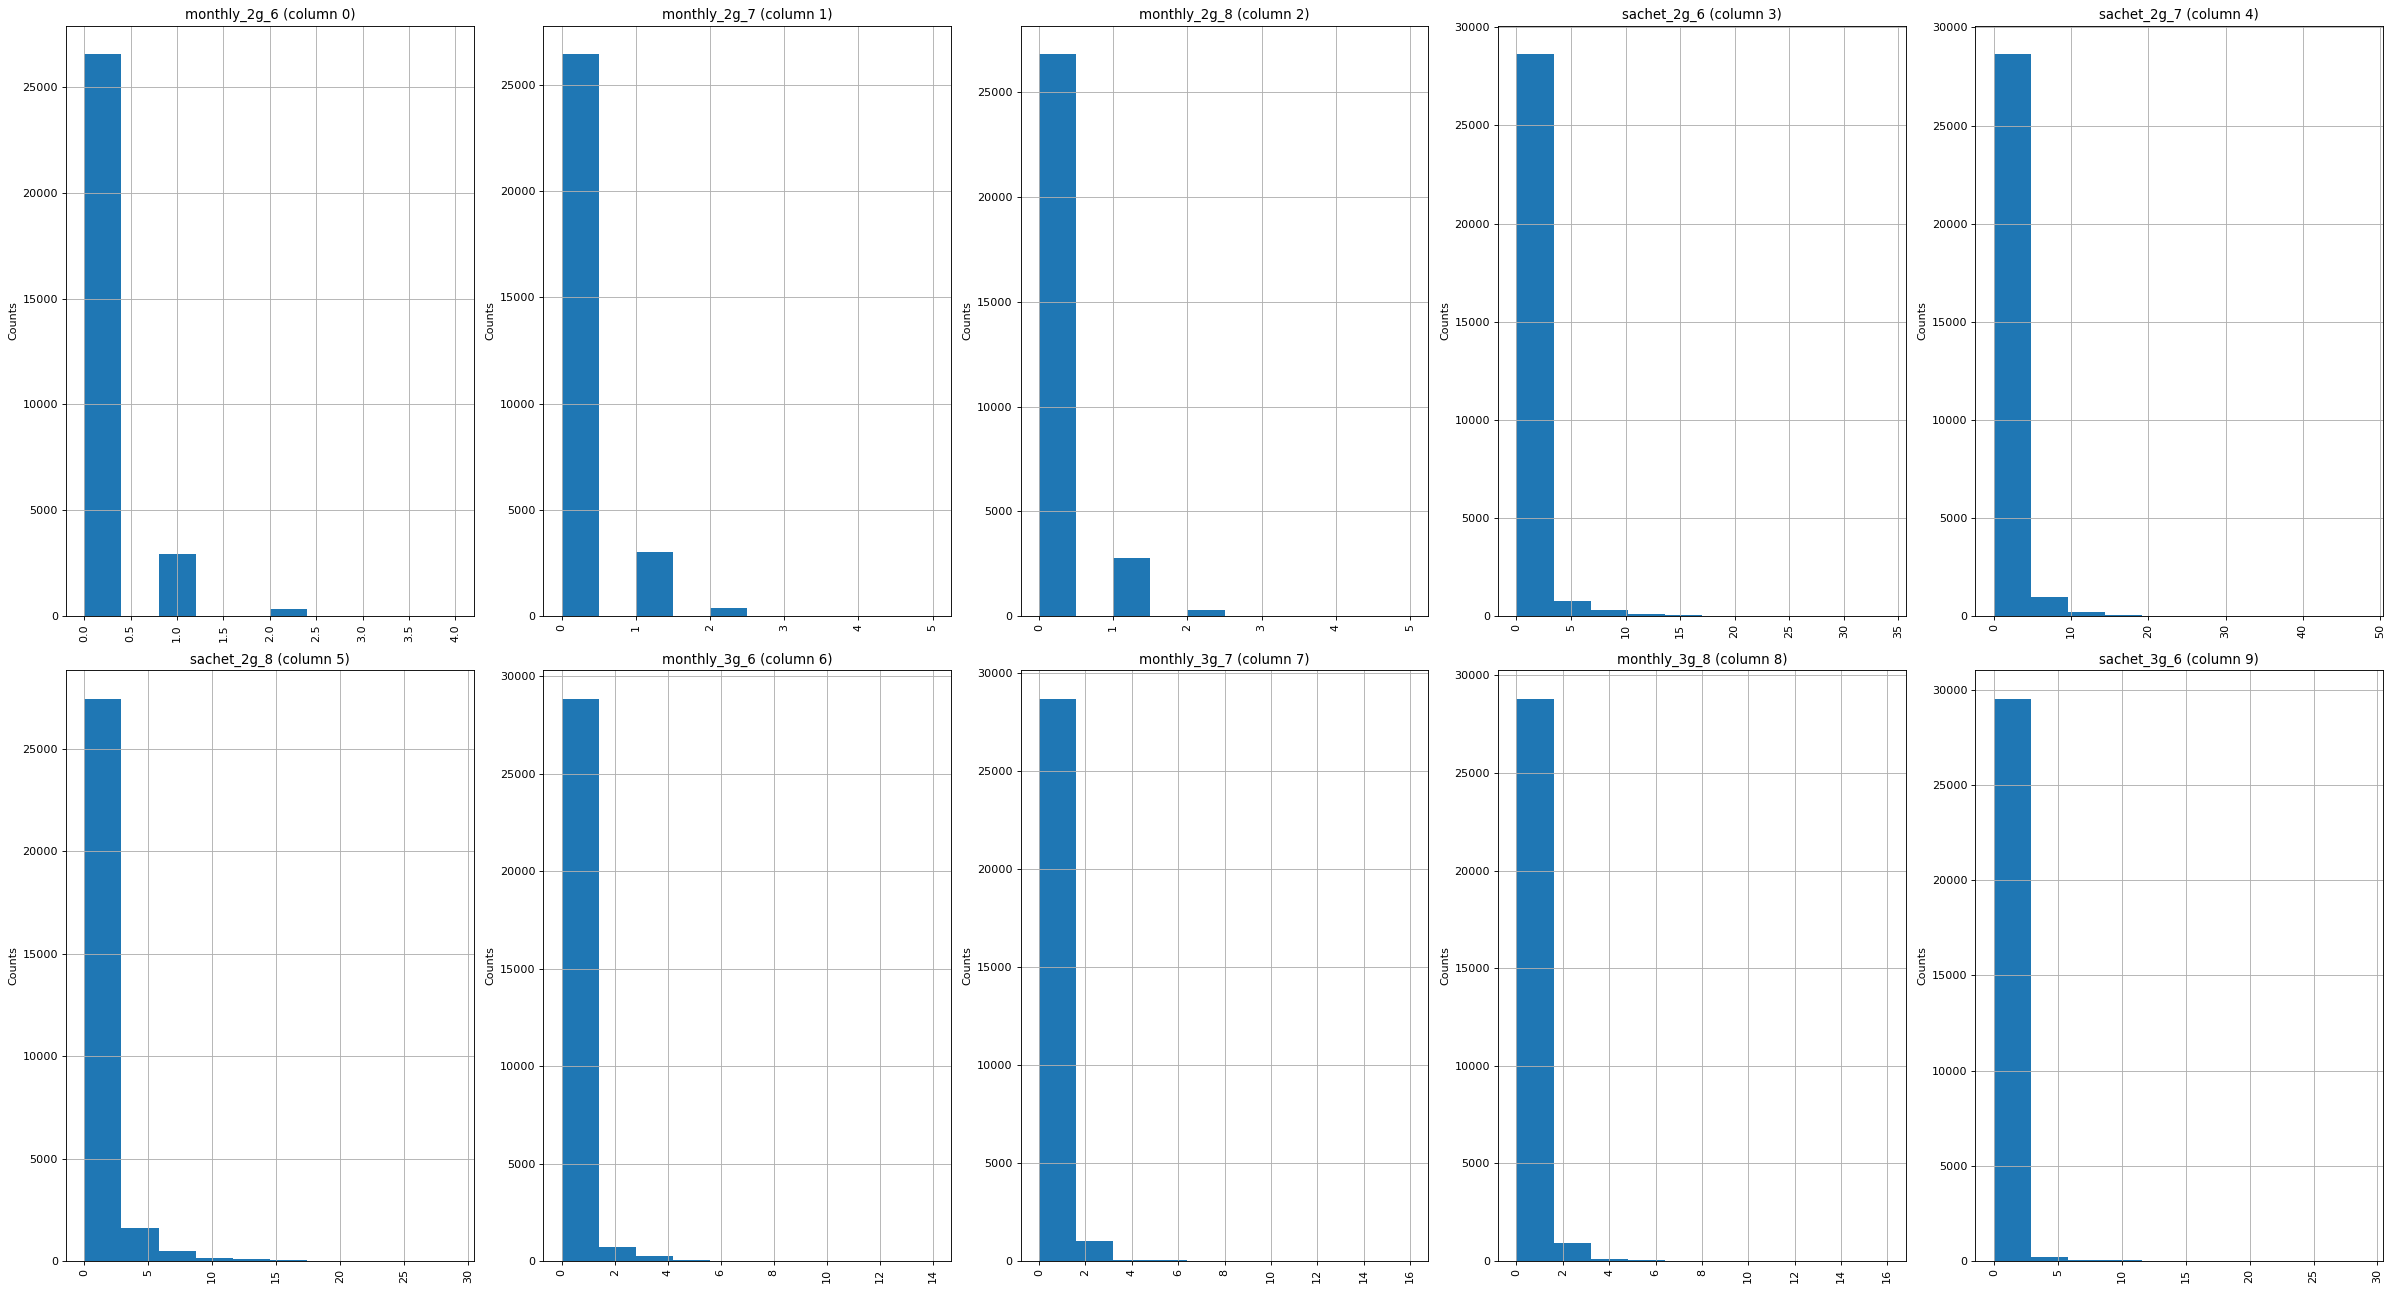

In [81]:
#Plottng the Distribution plot
import math
plotPerColumnDistribution(data_high_val_cust, 10, 5)

Text(0.5, 1.0, 'Churn Vs Base Cost')

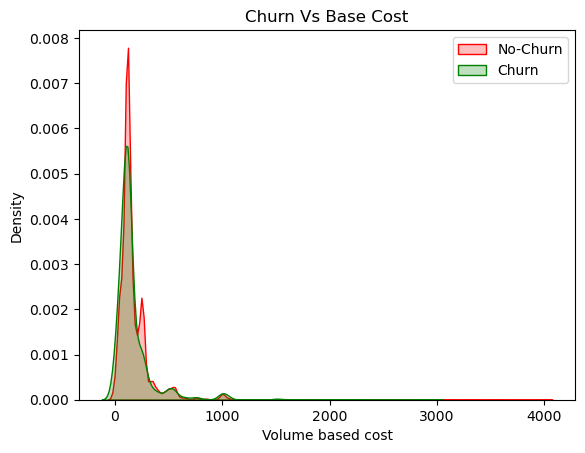

In [83]:
# churn Vs Base Cost month 6
ax = sns.kdeplot(data_high_val_cust.max_rech_amt_6[(data_high_val_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data_high_val_cust.max_rech_amt_6[(data_high_val_cust["churn"] == 1)],
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Churn Vs Base Cost')

Text(0.5, 1.0, 'Churn Vs Base Cost')

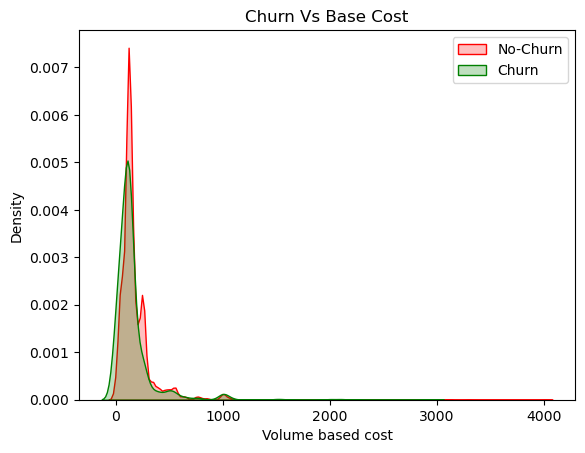

In [84]:
# churn Vs Base Cost month 7
ax = sns.kdeplot(data_high_val_cust.max_rech_amt_7[(data_high_val_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data_high_val_cust.max_rech_amt_7[(data_high_val_cust["churn"] == 1)],
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Churn Vs Base Cost')

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

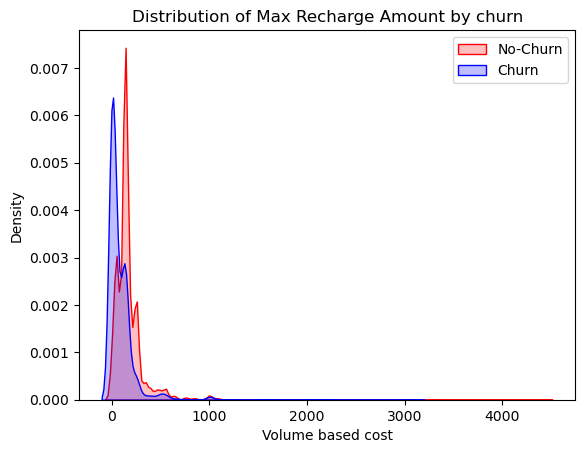

In [85]:
# churn vs max rechare amount
ax = sns.kdeplot(data_high_val_cust.max_rech_amt_8[(data_high_val_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data_high_val_cust.max_rech_amt_8[(data_high_val_cust["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

## Predicting Modeling using Logistics Regression 

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [87]:
X = (data_high_val_cust.iloc[:,2:])
X = X.loc[:,X.columns != 'churn']
y = data_high_val_cust.loc[:, 'churn']

scaler = StandardScaler()
scaler.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =100)

In [89]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [90]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.9297423887587822
F1 score:  0.5731707317073171
Recall:  0.47635135135135137
Precision:  0.7193877551020408

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      5386
           1       0.72      0.48      0.57       592

    accuracy                           0.93      5978
   macro avg       0.83      0.73      0.77      5978
weighted avg       0.92      0.93      0.92      5978


 confussion matrix:
 [[5276  110]
 [ 310  282]]


In [91]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

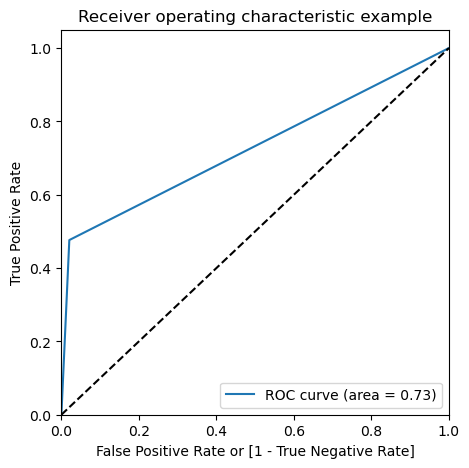

In [92]:
draw_roc(y_test, y_pred)

Inference:

In summary, the basic logistic regression model achieved an accuracy of 92.7%. However, the other metrics, such as recall at 47.5% and precision at 71.2%, indicate that the model's performance is not balanced. Additionally, the ROC curve's area under the curve (AUC) is 0.73.

To address the issue of class imbalance and potentially improve model performance, we plan to implement a more advanced model, specifically the Random Forest algorithm. This advanced model will be used to enhance the predictive capabilities and overall performance of the classification task.

## Handling Imbalanced Dataset

Text(0.5, 1.0, 'Class Distributions \n (0: No Claim || 1: Claim)')

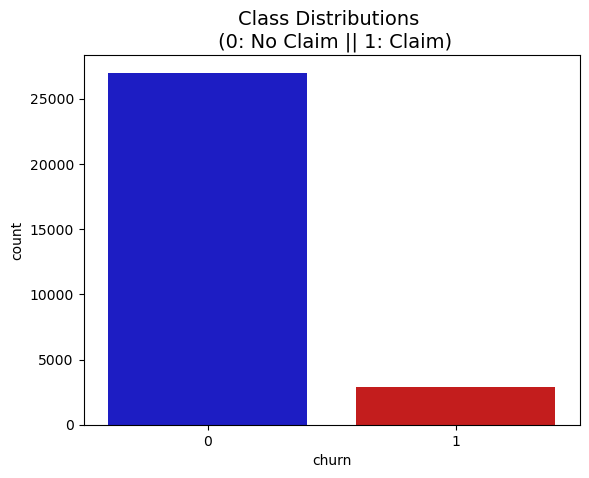

In [93]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('churn', data=data_high_val_cust, palette=colors)
plt.title('Class Distributions \n (0: No Claim || 1: Claim)', fontsize=14)

## SMOTE

In [97]:
pip install imbalanced-learn


     -------------------------------------- 235.6/235.6 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [98]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)

# Resample the training data
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)

# Check the length of the resampled data
len(X_resampled_smt)

43226

In [101]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 21613), (1, 21613)]


## Prediction Post Imbalance Treatment 

## Random Forest - SMOTE

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf_smt = RandomForestClassifier()
rf_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_rf_smt = rf_smt.predict(X_test)

In [103]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt))

Accuracy:  0.9262295081967213
F1 score:  0.6405867970660146
Recall:  0.6638513513513513
Precision:  0.6188976377952756

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      5386
           1       0.62      0.66      0.64       592

    accuracy                           0.93      5978
   macro avg       0.79      0.81      0.80      5978
weighted avg       0.93      0.93      0.93      5978


 confussion matrix:
 [[5144  242]
 [ 199  393]]


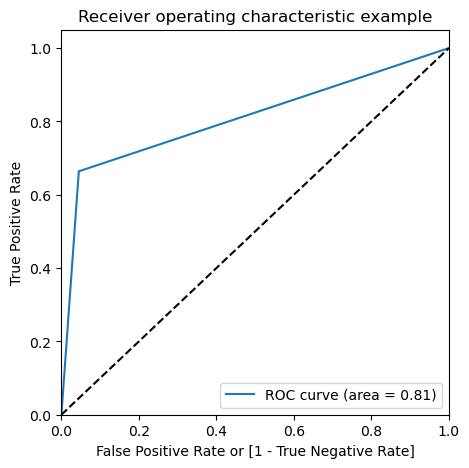

In [105]:
draw_roc(y_test, y_pred_rf_smt)

Inference:

The ROC curve has shown a significant improvement with an AUC (Area Under the Curve) of 0.82, indicating better overall model performance.

Additionally, both recall and precision metrics have experienced a notable increase in their values, suggesting improved accuracy and the model's ability to correctly identify positive cases (recall) and avoid false positives (precision).

## Decision Trees - SMOTE

In [106]:
from sklearn.tree import DecisionTreeClassifier
dtc_smt = DecisionTreeClassifier(random_state=0)
dtc_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_dtc_smt = dtc_smt.predict(X_test)

In [107]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt))

Accuracy:  0.8624958179993308
F1 score:  0.44832214765100675
Recall:  0.5641891891891891
Precision:  0.37193763919821826

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      5386
           1       0.37      0.56      0.45       592

    accuracy                           0.86      5978
   macro avg       0.66      0.73      0.68      5978
weighted avg       0.89      0.86      0.87      5978


 confussion matrix:
 [[4822  564]
 [ 258  334]]


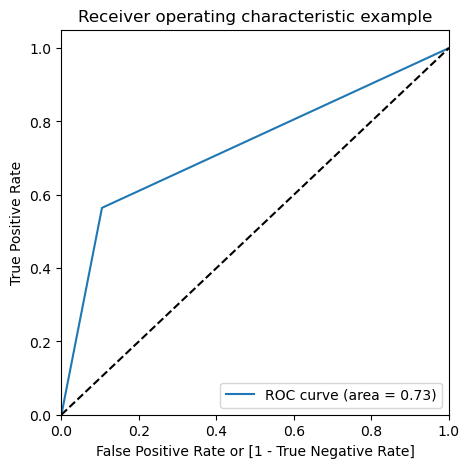

In [108]:
draw_roc(y_test, y_pred_dtc_smt)

Inference:

When comparing the performance of Decision Trees with SMOTE to that of Random Forest with SMOTE, the Decision Tree model exhibits inefficiency, as indicated by a degradation in the ROC curve value. In other words, the Decision Tree model does not perform as well as the Random Forest model when applied in conjunction with SMOTE for handling class imbalance.

## Feature Importance Analysis

In [109]:
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(X_train, y_train)

# Extract feature importances
feature_importance = pd.DataFrame(data={
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
})
top_n = 10 
top_features = feature_importance.sort_values(by='Importance', ascending=False).head(top_n)
print(top_features)


                Feature  Importance
80       total_ic_mou_8    0.041250
2                arpu_8    0.036600
65         loc_ic_mou_8    0.033845
59     loc_ic_t2m_mou_8    0.033230
53       total_og_mou_8    0.029830
56     loc_ic_t2t_mou_8    0.029282
95     total_rech_amt_8    0.026138
145   loc_ic_mou_8_perc    0.024875
101  last_day_rch_amt_8    0.019415
29         loc_og_mou_8    0.018805


In [110]:
feature_importance = feature_importance.loc[feature_importance['Importance'] != 0]

In [111]:
feature_importance.sort_values(by='Importance',ascending=False).head(15)

,Feature,Importance
80,total_ic_mou_8,0.041250
2,arpu_8,0.036600
65,loc_ic_mou_8,0.033845
59,loc_ic_t2m_mou_8,0.033230
53,total_og_mou_8,0.029830
56,loc_ic_t2t_mou_8,0.029282
95,total_rech_amt_8,0.026138
145,loc_ic_mou_8_perc,0.024875
101,last_day_rch_amt_8,0.019415
29,loc_og_mou_8,0.018805


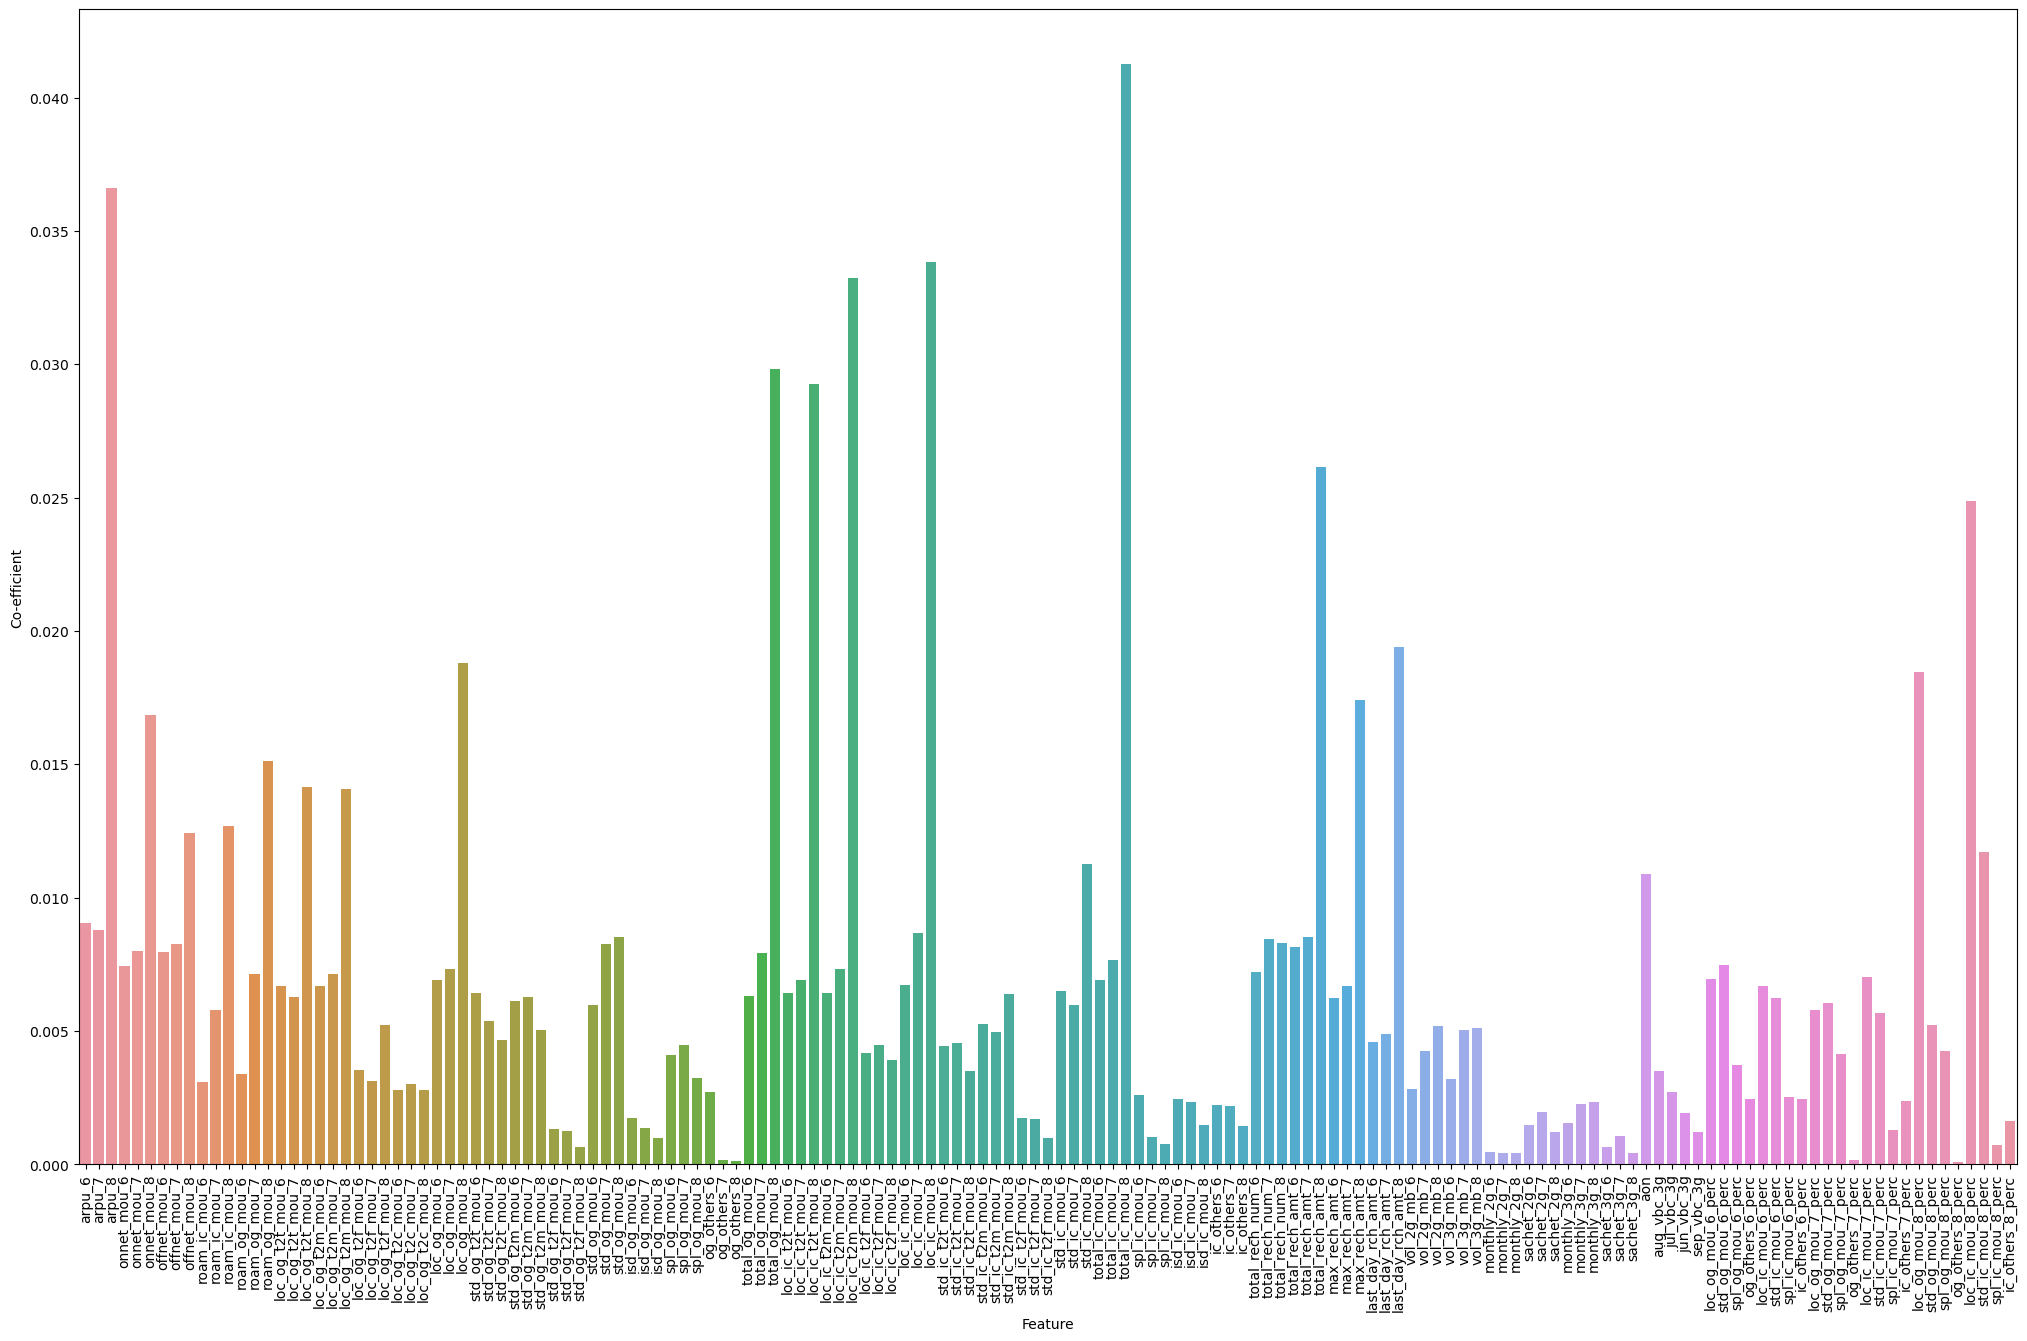

In [112]:
plt.figure(figsize=(25,15))
plt.subplot(111)
ax1 = sns.barplot(x = feature_importance['Feature'], y = feature_importance['Importance'])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize=10)
plt.ylabel('Co-efficient')
plt.show()

Conclusion:


In terms of modeling performance, after applying SMOTE to address class imbalance, the Random Forest model demonstrates significant improvement. It achieves a higher ROC curve value of 0.81, indicating enhanced predictive capability. The accuracy of the model also stands at an impressive 92%.

The key features that have a major influence on predicting customer churn are as follows:

Recharge-related behavior

1. Outgoing calls in the eighth month (arpu_8)
2. Local incoming calls in the eighth month (loc_ic_t2m_mou_8)
3. Total incoming calls in the eighth month (total_ic_mou_8)
4. Percentage of local outgoing calls in the eighth month (loc_og_mou_8_perc)
5. Local outgoing calls to mobile numbers in the eighth month (loc_og_t2m_mou_8)
6. Total recharge amount in the eighth month (total_rech_amt_8)
7. Local incoming calls to other telecom operators in the eighth month (loc_ic_t2t_mou_8)
8. Local outgoing calls to fixed-line numbers in the eighth month (loc_og_t2t_mou_8)
9. Maximum recharge amount in the eighth month (max_rech_amt_8)
10. Percentage of local incoming calls in the eighth month (loc_ic_mou_8_perc)
11. Last day recharge amount in the eighth month (last_day_rch_amt_8)
12. Total outgoing calls in the eighth month (total_og_mou_8)
13. Local outgoing calls to mobile numbers in the eighth month (loc_og_t2t_mou_8)
14. Off-network outgoing calls in the eighth month (offnet_mou_8).
15. These features collectively provide valuable insights into customer behavior and serve as key indicators for predicting churn.






### Recommendations 

To improve customer retention and address potential issues, it's essential to closely monitor month-on-month trends in ARPU (Average Revenue Per User), recharge behavior, and call activities. If a declining trend is identified, the following actions can be taken:

Offer Recharge Discounts: Implementing special discounts or promotional offers on recharges can incentivize customers to top up their accounts more frequently.

Introduce Value-Added Packs: Introducing value-added packs for recharges, such as bonus data or additional talk time, can attract and retain customers who are seeking extra benefits from their recharges.

Evaluate Network Quality: Investigate potential concerns regarding network performance that may be affecting call activities. Addressing network quality issues can improve the overall customer experience and encourage more usage of call services.

By proactively monitoring and addressing these aspects, telecom providers can enhance customer satisfaction, reduce churn, and ensure the sustainability of their business.